## R version
One of the relatively easy optimizations available is to use an up-to-date version of R. In general, R is very conservative, so upgrading doesn't break existing code. However, a new version will often provide free speed boosts for key functions.

The version command returns a list that contains (among other things) the major and minor version of R currently being used.

- Print the version details of R using version. (It's not a function.)
- Use dollar indexing (`$`) to extract the major component of version and assign it to the variable `major`.
- Likewise, extract the minor component and assign it to the variable `minor`.

In [1]:
print(version)

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          


In [2]:
# Assign the variable major to the major component
major <- version$major
print(major)
# Assign the variable minor to the minor component
minor <- version$minor
print(minor)

[1] "3"
[1] "6.1"


## Comparing read times of CSV and RDS files

One of the most common tasks we perform is reading in data from CSV files. However, for large CSV files this can be slow. One neat trick is to read in the data and save as an R binary file (rds) using `saveRDS()`. To read in the rds file, we use `readRDS()`.

Note: Since rds is R's native format for storing single objects, you have not introduced any third-party dependencies that may change in the future.

To benchmark the two approaches, you can use `system.time()`. This function returns the time taken to evaluate any R expression. For example, to time how long it takes to calculate the square root of the numbers from one to ten million, you would write the following:

> `system.time(sqrt(1:1e7))`

The files "movies.csv" and "movies.rds" both contain identical data frames with information on 45,000 movies.

- Using the system.time() function, how long does it take to read in the CSV file using `read.csv("movies.csv")`.
- Repeat for the rds file, "movies.rds" using `readRDS()`.

In [20]:
# How long does it take to read movies from CSV?
system.time(read.csv("movies.csv"))



   user  system elapsed 
   0.52    0.03    0.57 

In [13]:
# How long does it take to read movies from RDS?
system.time(readRDS('movies.rds'))

   user  system elapsed 
   0.06    0.00    0.06 

In [5]:
?read.csv


In [9]:
?saveRDS

In [12]:
?system.time

## Operational differences: "<-" and "="
There are a number of ways to assign variables to objects. The two standard ways are to use the = or <- operators. Which of the following statements is true?

**Possible Answers**
- () The operators are identical.
- () The operators have the same precedence.
- (x) Using the <- operator inside a function call will create a new (or overwrite an existing) object.

## Elapsed time
Using `system.time()` is convenient, but it does have its drawbacks when comparing multiple function calls. The `microbenchmark` package solves this problem with the `microbenchmark()` function.

The "movies.csv" and "movies.rds" files are available in your workspace.

- Load the microbenchmark package using the library() function.
- Using microbenchmark(), read.csv(), and readRDS(), compare the time it takes to import the CSV file with the time it takes to - import the RDS file. Store the result as a variable called compare.
- In your call to microbenchmark(), specify times = 10 to call each function 10 times.
- Print compare to see the results.

In [22]:
install.packages("microbenchmark")

Installing package into 'C:/Users/Admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'microbenchmark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpEfGn8F\downloaded_packages


In [23]:
# Load the microbenchmark package
library(microbenchmark)

# Compare the two functions
compare <- microbenchmark(read.csv("movies.csv"), 
                          readRDS("movies.rds"), 
                          times = 10)

# Print compare
print(compare)

Warning message:
"package 'microbenchmark' was built under R version 3.6.2"

Unit: milliseconds
                   expr      min       lq      mean    median       uq      max
 read.csv("movies.csv") 540.5316 581.2584 677.99609 653.19080 791.1752 850.8816
  readRDS("movies.rds")  65.8589  67.2407  78.87263  76.17165  82.6004 122.2619
 neval cld
    10   b
    10  a 


Great work! The `microbenchmark()` function makes it easier to compare multiple function calls at once by compiling all the relevant information in a data frame. It does this by running each function call multiple times, recording the time it took for the function to run each time, then computing summary statistics for each expression as you can see here.

## Relative time
When benchmarking it's important to consider both absolute and relative times. Using the timings below, on average a single call to read.csv() is 720 - 80 = 640 milliseconds slower than that of readRDS().

`> microbenchmark(read.csv("movies.csv"),
                 readRDS("movies.rds"),
                 times = 10)`

Unit: milliseconds
                       expr  min  lq  mean  median   uq neval cld
read.csv("movies.csv")  540  660 680   720     720  740    10   b
 readRDS("movies.rds")   70   80  90    80     100  110    10  a 
Approximately, how much slower is the mean time of read.csv() compared to readRDS()?

**Possible Answers**
- () 3 times slower.
- () 6 times slower.
- (x) 9 times slower.

In [25]:
install.packages("benchmarkme")

Installing package into 'C:/Users/Admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'benchmarkmeData', 'doParallel'



package 'benchmarkmeData' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'benchmarkme' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpEfGn8F\downloaded_packages


In [26]:
# Load the benchmarkme package
library("benchmarkme")

# Assign the variable ram to the amount of RAM on this machine
ram <- get_ram()
ram

Warning message:
"package 'benchmarkme' was built under R version 3.6.2"

NA B

In [27]:
# Assign the variable cpu to the cpu specs
cpu <- get_cpu()
cpu

$vendor_id
[1] "GenuineIntel"

$model_name
[1] "Intel(R) Core(TM) i7-2670QM CPU @ 2.20GHz"

$no_of_cores
[1] 8

## Benchmark DataCamp's machine
The [benchmarkme](https://www.rdocumentation.org/packages/benchmarkme/versions/1.0.3) package allows you to run a set of standardized benchmarks and compare your results to other users. One set of benchmarks tests is reading and writing speeds.

The function call

> `res = benchmark_io(runs = 1, size = 5)`<br>
> `records the length of time it takes to read and write a 5MB file.`

**Instructions**

- Find the time it takes to read and write a 5 MB file. Assign the result to `res`. (Do not attempt to read and write a 50 MB file. Your session on DataCamp may crash)
- Compare DataCamp to other users via plot(res).

Preparing read/write io
# IO benchmarks (2 tests) for size 5 MB:
	 Writing a csv with 625000 values: 2.18 (sec).
	 Reading a csv with 625000 values: 0.42 (sec).
You are ranked 41 out of 47 machines.


Press return to get next plot 


You are ranked 38 out of 47 machines.


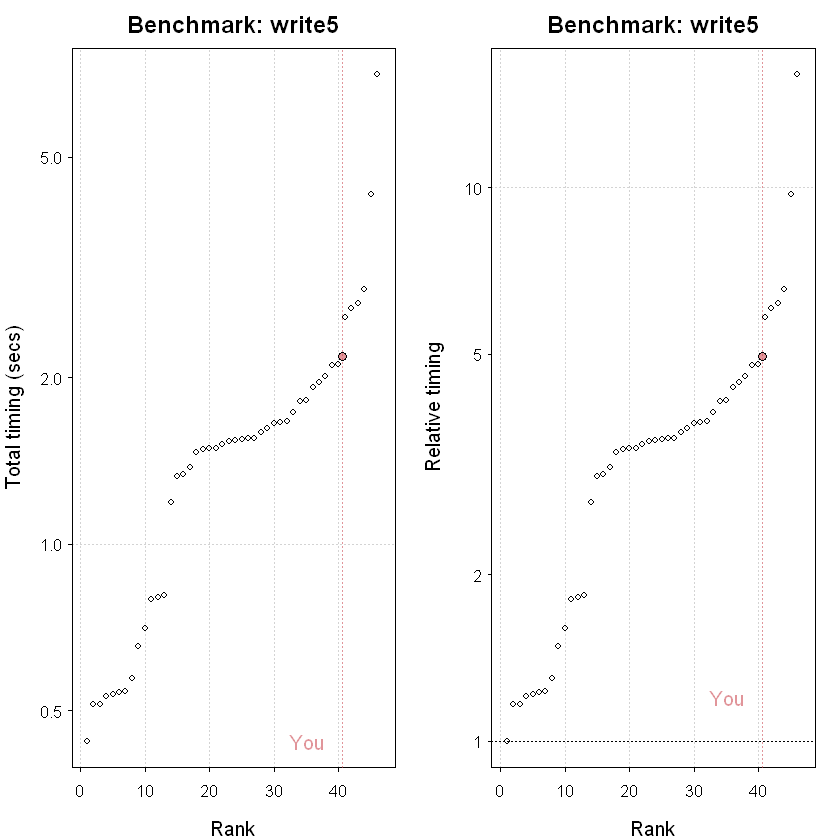

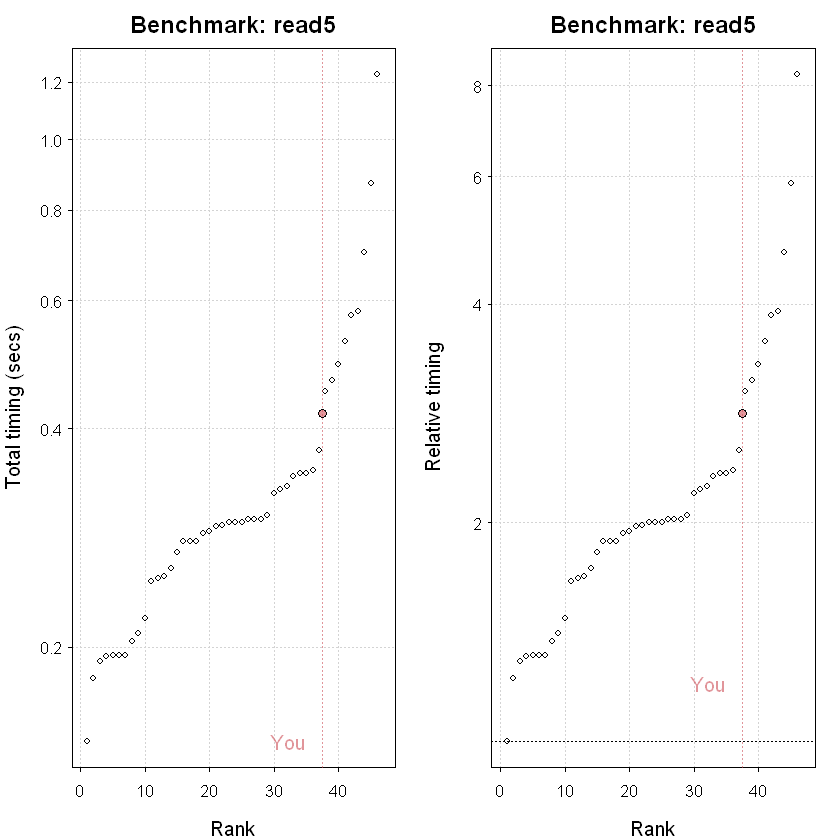

In [28]:
# Run the io benchmark
res <- benchmark_io(runs = 1, size = 5)
?benchmark_io
# Plot the results
plot(res)